<a href="https://colab.research.google.com/github/likeshd/time_series_models_libraries/blob/main/1)TS_Data_Preparation_DL(LSTM%2C_RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from IPython.display import display, Image

mpl.rcParams["figure.figsize"] = (10,8)
mpl.rcParams["axes.grid"] = False


In [2]:
df = pd.read_csv("/content/energydata_complete.csv")
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [9]:
df[['date', 'T_out', 'RH_out', 'Appliances','lights']]

,date,T_out,RH_out,Appliances,lights
0,2016-01-11 17:00:00,6.600000,92.000000,60,30
1,2016-01-11 17:10:00,6.483333,92.000000,60,30
2,2016-01-11 17:20:00,6.366667,92.000000,50,30
3,2016-01-11 17:30:00,6.250000,92.000000,50,40
4,2016-01-11 17:40:00,6.133333,92.000000,60,40
...,...,...,...,...,...
19730,2016-05-27 17:20:00,22.733333,55.666667,100,0
19731,2016-05-27 17:30:00,22.600000,56.000000,90,0
19732,2016-05-27 17:40:00,22.466667,56.333333,270,10
19733,2016-05-27 17:50:00,22.333333,56.666667,420,10


In [5]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [6]:
df["date"] = pd.to_datetime(df['date'],infer_datetime_format= True)

<ipython-input-6-84cb5dce20be>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["date"] = pd.to_datetime(df['date'],infer_datetime_format= True)


<Axes: xlabel='date'>

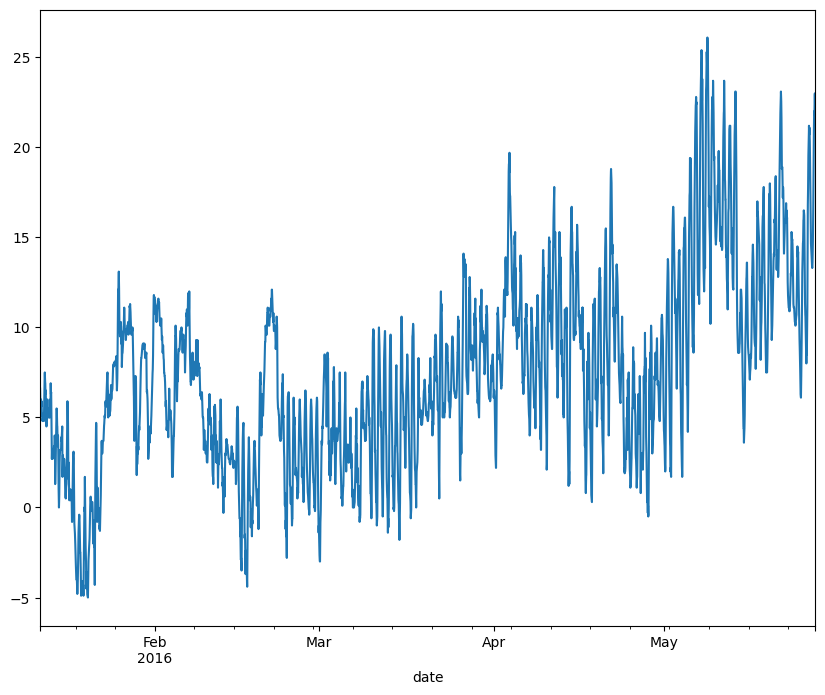

In [7]:
df.set_index('date')['T_out'].plot()

In [8]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


array([<Axes: xlabel='date'>, <Axes: xlabel='date'>,
       <Axes: xlabel='date'>, <Axes: xlabel='date'>], dtype=object)

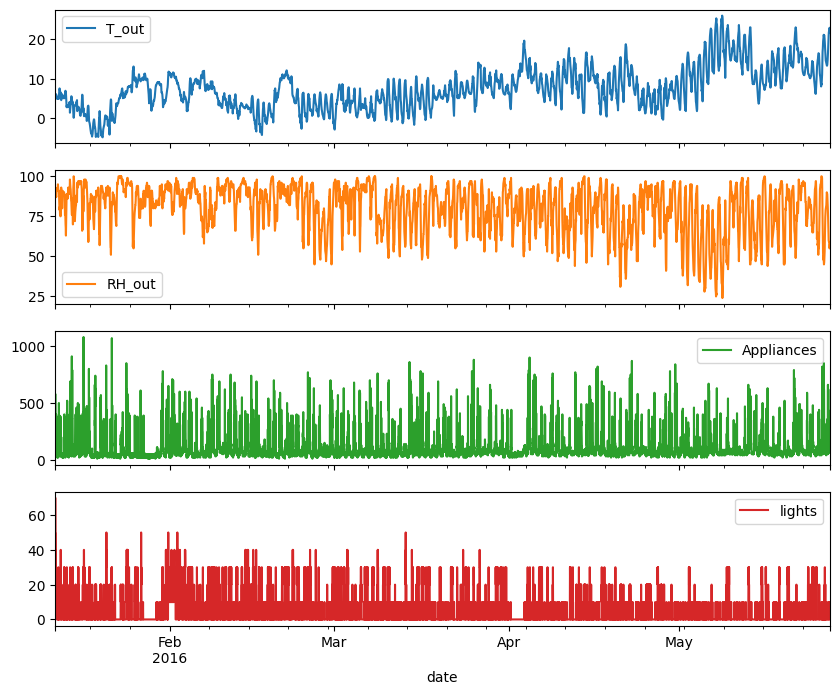

In [18]:
df.set_index('date')[[ 'T_out', 'RH_out', 'Appliances','lights']].plot(subplots=True)

In [14]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [19]:
feature = df[['Appliances','T_out', 'RH_out']].to_numpy().tolist()
target = df['Appliances'].tolist()

In [23]:
print(len(feature))
feature[:11]



19735


[[60.0, 6.6, 92.0],
 [60.0, 6.48333333333333, 92.0],
 [50.0, 6.36666666666667, 92.0],
 [50.0, 6.25, 92.0],
 [60.0, 6.133333333333329, 92.0],
 [50.0, 6.01666666666667, 92.0],
 [60.0, 5.9, 92.0],
 [60.0, 5.91666666666667, 91.8333333333333],
 [60.0, 5.93333333333333, 91.6666666666667],
 [70.0, 5.95, 91.5],
 [230.0, 5.96666666666667, 91.3333333333333]]

In [25]:
print(len(target))
target[:11]

19735


[60, 60, 50, 50, 60, 50, 60, 60, 60, 70, 230]

In [26]:
ts_generator = TimeseriesGenerator(feature, target, length = 6, sampling_rate=1,batch_size= 1)

In [30]:
ts_generator[0]

(array([[[60.        ,  6.6       , 92.        ],
         [60.        ,  6.48333333, 92.        ],
         [50.        ,  6.36666667, 92.        ],
         [50.        ,  6.25      , 92.        ],
         [60.        ,  6.13333333, 92.        ],
         [50.        ,  6.01666667, 92.        ]]]),
 array([60]))

In [33]:
ts_generator[0][0][0]

array([[60.        ,  6.6       , 92.        ],
       [60.        ,  6.48333333, 92.        ],
       [50.        ,  6.36666667, 92.        ],
       [50.        ,  6.25      , 92.        ],
       [60.        ,  6.13333333, 92.        ],
       [50.        ,  6.01666667, 92.        ]])

In [34]:
ts_generator[1]

(array([[[60.        ,  6.48333333, 92.        ],
         [50.        ,  6.36666667, 92.        ],
         [50.        ,  6.25      , 92.        ],
         [60.        ,  6.13333333, 92.        ],
         [50.        ,  6.01666667, 92.        ],
         [60.        ,  5.9       , 92.        ]]]),
 array([60]))

In [35]:
ts_generator[2]

(array([[[50.        ,  6.36666667, 92.        ],
         [50.        ,  6.25      , 92.        ],
         [60.        ,  6.13333333, 92.        ],
         [50.        ,  6.01666667, 92.        ],
         [60.        ,  5.9       , 92.        ],
         [60.        ,  5.91666667, 91.83333333]]]),
 array([60]))

In [36]:
pd.concat([df['Appliances'],df["Appliances"].shift(-1),df["Appliances"].shift(-2)], axis =1)

,Appliances,Appliances,Appliances
0,60,60.0,50.0
1,60,50.0,50.0
2,50,50.0,60.0
3,50,60.0,50.0
4,60,50.0,60.0
...,...,...,...
19730,100,90.0,270.0
19731,90,270.0,420.0
19732,270,420.0,430.0
19733,420,430.0,NaN


In [37]:
df["Appliances"].shift(-1)


0         60.0
1         50.0
2         50.0
3         60.0
4         50.0
         ...  
19730     90.0
19731    270.0
19732    420.0
19733    430.0
19734      NaN
Name: Appliances, Length: 19735, dtype: float64

In [39]:
multi_target = pd.concat([df['Appliances'],df["Appliances"].shift(-1),df["Appliances"].shift(-2)], axis =1).dropna().to_numpy().tolist()

In [42]:
multi_target[0:13]

[[60.0, 60.0, 50.0],
 [60.0, 50.0, 50.0],
 [50.0, 50.0, 60.0],
 [50.0, 60.0, 50.0],
 [60.0, 50.0, 60.0],
 [50.0, 60.0, 60.0],
 [60.0, 60.0, 60.0],
 [60.0, 60.0, 70.0],
 [60.0, 70.0, 230.0],
 [70.0, 230.0, 580.0],
 [230.0, 580.0, 430.0],
 [580.0, 430.0, 250.0],
 [430.0, 250.0, 100.0]]

In [45]:
ts_generator = TimeseriesGenerator(feature[:-2], multi_target, length = 6, sampling_rate =1,batch_size = 1,stride =6 )

In [46]:
ts_generator[0]

(array([[[60.        ,  6.6       , 92.        ],
         [60.        ,  6.48333333, 92.        ],
         [50.        ,  6.36666667, 92.        ],
         [50.        ,  6.25      , 92.        ],
         [60.        ,  6.13333333, 92.        ],
         [50.        ,  6.01666667, 92.        ]]]),
 array([[60., 60., 60.]]))

In [47]:
ts_generator[1]

(array([[[ 60.        ,   5.9       ,  92.        ],
         [ 60.        ,   5.91666667,  91.83333333],
         [ 60.        ,   5.93333333,  91.66666667],
         [ 70.        ,   5.95      ,  91.5       ],
         [230.        ,   5.96666667,  91.33333333],
         [580.        ,   5.98333333,  91.16666667]]]),
 array([[430., 250., 100.]]))